In [22]:
###
# Create a simple graph and have 1 train 1 line and low spawn rate per line
###

include("functions.jl")
include("classes.jl")
include("heap_functions.jl")

max_time = 20

# Define a few variables
a_neighbour = Dict("l_fw" => ["b", 1])
station_a = Station("a", ["l"], "Station A", 6, 0, a_neighbour, 2, [], [])


b_neighbour = Dict("l_fw" => ["c", 2], "l_bw" => ["a", 1])
station_b = Station("b", ["l"], "Station B", 6, 1, b_neighbour, 2, [], [])

c_neighbour = Dict("l_bw" => ["b", 2])
station_c = Station("c", ["l"], "Station C", 6, 2, c_neighbour, 2, [], [])

train = Train("1", "l", "fw", false, 2, [])


stations = Dict(
		"a" => station_a,
		"b" => station_b,
		"c" => station_c
	)

trains = Dict(
		"1" => train
	)

lines = Dict(
		"l_fw" => ["a", "b", "c"],
		"l_bw" => ["c", "b", "a"]
	)

paths = Dict(
		"a_b" => [["b", "l_fw"]],
		"a_c" => [["c", "l_fw"]],
		"b_a" => [["a", "l_bw"]],
		"b_c" => [["c", "l_fw"]],
		"c_a" => [["a", "l_bw"]],
		"c_b" => [["b", "l_bw"]],
	)
metro = Metro(stations, trains, lines, paths)


# Start the Event queue
event_queue = []
first_event = Event(
		0,
		train_reach_station!,
		Dict(
				:time => 0,
				:metro => metro,
				:train => "1",
				:station => "a"
			)
	)

spawn_event_a = Event(
		0,
		spawn_commuter!,
		Dict(
				:time => 0,
				:metro => metro,
				:station => "a"
			)

	)

spawn_event_b = Event(
		1,
		spawn_commuter!,
		Dict(
				:time => 1,
				:metro => metro,
				:station => "b"
			)

	)

spawn_event_c = Event(
		2,
		spawn_commuter!,
		Dict(
				:time => 2,
				:metro => metro,
				:station => "c"
			)

	)
heappush!(event_queue, first_event)
heappush!(event_queue, spawn_event_a)
heappush!(event_queue, spawn_event_b)
heappush!(event_queue, spawn_event_c)

In [23]:
function simulate_1step!(metro, event_queue)
	
    # release the most recent event
    curr_event = heappop!(event_queue)
    # do whatever the event requires
    new_events = curr_event.fun(;curr_event.params...)
    # update and add the new events generated
    for i in new_events
        heappush!(event_queue, i)
    end
end

simulate_1step! (generic function with 1 method)

In [26]:
simulate_1step!(metro, event_queue)

time 2: Train 1 leaving  Station a
Event(2, spawn_commuter!, Dict{Symbol, Any}(:station => "c", :metro => Metro(Dict{String, Station}("c" => Station("c", ["l"], "Station C", 6.0, 2, Dict{String, Vector}("l_bw" => Any["b", 2]), 2, Commuter[], Any[]), "b" => Station("b", ["l"], "Station B", 6.0, 1, Dict{String, Vector}("l_fw" => Any["c", 2], "l_bw" => Any["a", 1]), 2, Commuter[], Any[]), "a" => Station("a", ["l"], "Station A", 6.0, 0, Dict{String, Vector}("l_fw" => Any["b", 1]), 2, Commuter[Commuter("a", "a_c", true, 0, 0)], Any[])), Dict{String, Train}("1" => Train("1", "l", "fw", false, 2, Commuter[])), Dict{String, Vector}("l_fw" => ["a", "b", "c"], "l_bw" => ["c", "b", "a"]), Dict{String, Vector}("a_c" => [["c", "l_fw"]], "b_c" => [["c", "l_fw"]], "c_a" => [["a", "l_bw"]], "c_b" => [["b", "l_bw"]], "a_b" => [["b", "l_fw"]], "b_a" => [["a", "l_bw"]])), :time => 2))
Event(3, train_reach_station!, Dict{Symbol, Any}(:station => "b", :train => "1", :metro => Metro(Dict{String, Station}("c

In [2]:
for i in []
    print(i)
end

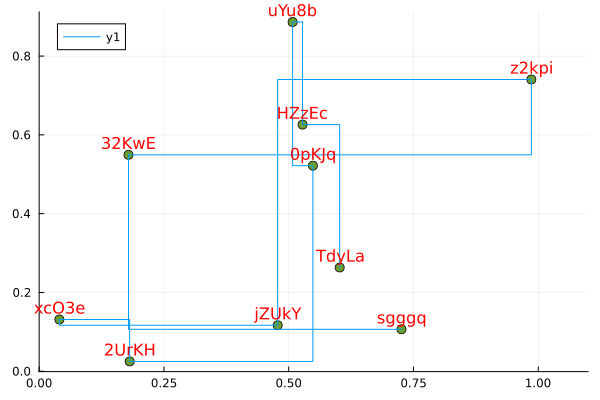

In [11]:
using Plots, Random
vals = rand(10,2)
p = scatter(vals[:,1], vals[:,2],xlim=[0,1.1], linetype=:steppre, markers=(:circle,5))
some_labels=randstring.(fill(5,10))
annotate!.(vals[:,1], vals[:,2].+0.03, text.(some_labels, :red, :above,11))
p

In [42]:
###
# Create a simple graph and have 1 train 1 line and low spawn rate per line
###
using Logging
using Plots, DataFrames, StatsPlots

include("simul_functions.jl")
include("classes.jl")
include("heap_functions.jl")

# io = open("log.txt", "w+")
# logger = SimpleLogger(io)
logger = ConsoleLogger(stderr, Logging.Debug)
# fileLogger = SimpleLogger(io, Logging.Debug)
# global_logger(fileLogger)
global_logger(logger)

max_time = 30

# Define a few variables
a_neighbour = Dict("l_fw" => ["b", 1])
station_a = Station("a", ["l"], "Station A", 6, 0, a_neighbour, 2, Dict(), [])


b_neighbour = Dict("l_fw" => ["c", 2], "l_bw" => ["a", 1])
station_b = Station("b", ["l"], "Station B", 6, 1, b_neighbour, 2, Dict(), [])

c_neighbour = Dict("l_bw" => ["b", 2])
station_c = Station("c", ["l"], "Station C", 6, 2, c_neighbour, 2, Dict(), [])

train = Train("1", "l", "fw", false, 5, Dict())


stations = Dict(
		"a" => station_a,
		"b" => station_b,
		"c" => station_c
	)

trains = Dict(
		"1" => train
	)

lines = Dict(
		"l_fw" => ["a", "b", "c"],
		"l_bw" => ["c", "b", "a"]
	)

paths = Dict(
		"a" => Dict(
			"b" => Dict(
				"board" => "l_fw",
				"alight" => "b"),
			"c" => Dict(
				"board" => "l_fw",
				"alight" => "c")
			),
		"b" => Dict(
			"a" => Dict(
				"board" => "l_bw",
				"alight" => "a"),
			"c" => Dict(
				"board" => "l_fw",
				"alight" => "c")
			),
		"c" => Dict(
			"a" => Dict(
				"board" => "l_bw",
				"alight" => "a"),
			"b" => Dict(
				"board" => "l_bw",
				"alight" => "b")
			)
	)
metro = Metro(stations, trains, lines, paths)


# Start the Event queue
event_queue = []
first_event = Event(
		0,
		train_reach_station!,
		Dict(
				:time => 0,
				:train => "1",
				:station => "a"
			)
	)

spawn_event_a = Event(
		0,
		spawn_commuter!,
		Dict(
				:time => 0,
				:station => "a"
			)

	)

spawn_event_b = Event(
		1,
		spawn_commuter!,
		Dict(
				:time => 1,
				:station => "b"
			)

	)

spawn_event_c = Event(
		2,
		spawn_commuter!,
		Dict(
				:time => 2,
				:station => "c"
			)

	)
heappush!(event_queue, first_event)
heappush!(event_queue, spawn_event_a)
heappush!(event_queue, spawn_event_b)
heappush!(event_queue, spawn_event_c)

data_store = Data_Store(Dict(), Dict(), Dict(), Dict())

final_data = simulate!(max_time, metro, event_queue, data_store)

for (k, v) in final_data.wait_times
	println("wait times for station $k")
	println(v)
end

for (origin, v) in final_data.travel_times
	for (dest, arr) in v 
		println("travel times from station $origin to station $dest")
		println(arr)
	end 
end 

for (k,v) in final_data.station_commuter_count
    println("Station $k")
    display(v)

    p = @df v plot(:time, [:count], linetype=:steppost, markers=(:circle,5))

    @df v annotate!(:time, :count.+0.03, text.(:event, :red, :left,5))
    savefig(p, "station_"*k*"_count.png")
end

for (k,v) in final_data.station_train_commuter_count
    println("Station $k")
    display(v)

    p = @df v plot(:time, [:count], linetype=:steppost, markers=(:circle,5))

    @df v annotate!(:time, :count.+0.03, text.(:event, :red, :left,5))
    savefig(p, "station_train_"*k*"_count.png")
end



┌ Debug: time 0: Train 1 reaching Station a
└ @ Main C:\Users\gabes\Documents\HighPerformanceComputing\Project\HPC_Project\simul_functions.jl:77
┌ Debug: time 0: 0 Commuters alighting Train 1 at Station a
└ @ Main C:\Users\gabes\Documents\HighPerformanceComputing\Project\HPC_Project\station_functions.jl:113
┌ Debug: time 0: spawning commuter at Station a that wants to go to b
└ @ Main C:\Users\gabes\Documents\HighPerformanceComputing\Project\HPC_Project\simul_functions.jl:15
┌ Debug: time 1: spawning commuter at Station b that wants to go to c
└ @ Main C:\Users\gabes\Documents\HighPerformanceComputing\Project\HPC_Project\simul_functions.jl:15
┌ Debug: time 2: spawning commuter at Station c that wants to go to b
└ @ Main C:\Users\gabes\Documents\HighPerformanceComputing\Project\HPC_Project\simul_functions.jl:15
┌ Debug: time 2: Train 1 leaving  Station a
└ @ Main C:\Users\gabes\Documents\HighPerformanceComputing\Project\HPC_Project\simul_functions.jl:114
┌ Debug: time 2: 1 Commuters boa

wait times for station c
[7, 1, 9, 3]
wait times for station b
[4, 12, 6]
wait times for station a
[2, 10, 4]
travel times from station c to station b
[11, 5]
travel times from station c to station a
[16, 10]
travel times from station b to station c
[8, 16, 10]
travel times from station a to station c
[17, 11]
travel times from station a to station b
[5]
Station c


┌ Debug: time 30: terminating 2 commuters at Station a
└ @ Main C:\Users\gabes\Documents\HighPerformanceComputing\Project\HPC_Project\station_functions.jl:34


Row,time,event,count
,Int64,String,Int64
1,2,post_spawn,1
2,7,post_alight,2
3,9,post_terminate,1
4,8,post_spawn,2
5,9,post_board,0
6,14,post_spawn,1
7,20,post_spawn,2
8,21,post_alight,6
9,23,post_terminate,2


Station b


Row,time,event,count
,Int64,String,Int64
1,1,post_spawn,1
2,3,post_alight,2
3,5,post_terminate,1
4,5,post_board,0
5,7,post_spawn,1
6,11,post_alight,3
7,13,post_terminate,1
8,13,post_spawn,2
9,13,post_board,2


Station a


Row,time,event,count
,Int64,String,Int64
1,0,post_alight,0
2,0,post_spawn,1
3,2,post_board,0
4,6,post_spawn,1
5,12,post_spawn,2
6,14,post_alight,2
7,16,post_board,0
8,18,post_spawn,1
9,24,post_spawn,2


Station c


Row,time,event,count
,Int64,String,Int64
1,7,pre_alight,1
2,9,pre_board,0
3,21,pre_alight,4
4,23,pre_board,0


Station b


Row,time,event,count
,Int64,String,Int64
1,3,pre_alight,1
2,5,pre_board,0
3,11,pre_alight,2
4,13,pre_board,0
5,17,pre_alight,2
6,19,pre_board,2
7,25,pre_alight,2
8,27,pre_board,2


Station a


Row,time,event,count
,Int64,String,Int64
1,0,pre_alight,0
2,2,pre_board,0
3,14,pre_alight,0
4,16,pre_board,0
5,28,pre_alight,2
